# Analysis for Question 3

Cleaning and analysing the PlayerStats CSV, that was scraped prior.

We will be looking to first produce some visualisations of every player in the dataset. I then will move on to determine if younger players, perform better than older players, by making two subsets of the dataset and plotting them both on a scatter plot. I will then move on to finding the most talented youth players.

In [1]:
#Importing relevant libraries
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as patches

In [2]:
# Reading in my csv file
dfPlayers = pd.read_csv('ALL_PLAYER_STATS.csv')
dfPlayers

,Name,Age,Nationality,Team,Rating,Total Kills,Headshot %,Total deaths,K/D Ratio,Damage / Round,Kills / Round,Maps played
0,Mathieu 'ZywOo' Herbaut,18,France,Vitality,1.38,9173,44.2,6500,1.41,93.5,0.89,396
1,Aleksandr 's1mple' Kostyliev,21,Ukraine,Natus Vincere,1.23,22271,42.2,17179,1.30,87.0,0.85,992
2,Ismailcan 'XANTARES' Dörtkardeş,23,Turkey,BIG,1.22,20805,53.8,16881,1.23,95.4,0.86,930
3,Hansel 'BnTeT' Ferdinand,23,Indonesia,TYLOO,1.21,11494,38.7,8736,1.32,86.4,0.81,553
4,Marcelo 'coldzera' David,24,Brazil,MIBR,1.20,20768,47.8,15675,1.32,82.5,0.80,1000
5,Simon 'Sico' Williams,24,New Zealand,Grayhound,1.19,10519,35.6,7879,1.34,82.6,0.79,524
6,Kaike 'KSCERATO' Cerato,19,Brazil,FURIA,1.23,6046,52.7,4449,1.36,80.7,0.76,315
7,Andrew 'Kaze' Khong,24,Malaysia,ViCi,1.19,9593,29.2,7491,1.28,81.5,0.79,468
8,WingHei 'Freeman' Cheung,19,Hong Kong,ViCi,1.21,10556,50.0,8434,1.25,83.6,0.80,520
9,Nikola 'NiKo' Kovač,22,Bosnia and Herzegovina,FaZe,1.18,22424,50.5,18480,1.21,86.3,0.81,1048


Having opened my CVS, I first wanted to check of every columns data types were correct.

In [3]:
dfPlayers.dtypes

Name               object
Age                 int64
Nationality        object
Team               object
Rating            float64
Total Kills         int64
Headshot %        float64
Total deaths        int64
K/D Ratio         float64
Damage / Round    float64
Kills / Round     float64
Maps played         int64
dtype: object

## Graphing the DataSet

To begin with, I plotted every player in my dataset, with Kill/Death ratio on the Y-axis and their average damage per round on the X-axis. Both of these stats are some of the best ways to judge a players skill. I then added a colour map on the age of the players to quickly determine if on average, younger players had higher scores in these areas, compared to their older conterparts.

Text(0.5, 1.0, 'Kill/Death Ratio vs Average Round Damage')

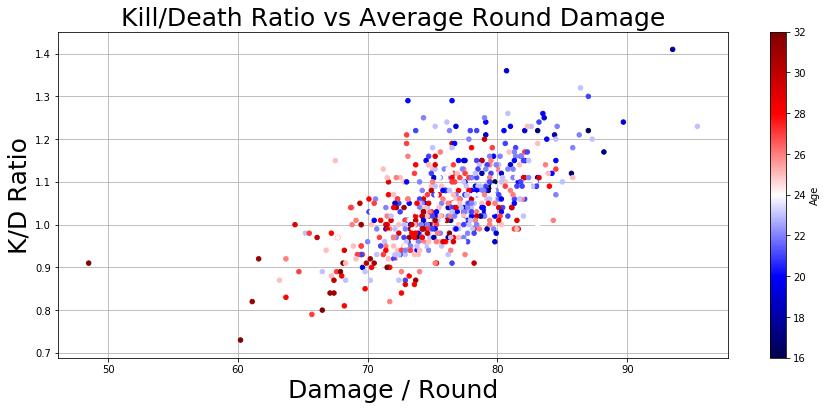

In [4]:
dfPlayers.plot(kind='scatter',zorder=3, x='Damage / Round', y='K/D Ratio',
        c='Age', colormap='seismic', 
        figsize=(15,6), sharex = False)
plt.xlabel('Damage / Round', fontsize=25)
plt.ylabel("K/D Ratio", fontsize=25)
plt.grid(True)
plt.title("Kill/Death Ratio vs Average Round Damage", fontsize=25)

From the scatter plot, it was evident that there was a lot more red dots performing worse than bluedots, but it was difficult to get the full picture. 
I decided to make two subsets of players, a group 3 years younger than the median of 24, and a group 3 years older.
I then plotted both there subsets on a scatter plot with Event Rating on the Y-axis, and Kill/Death ratio on the X-axis.
This plot provided enough proof to support that young players perform better than older players.

Text(0.5, 1.0, 'Rating vs Kill/Death Ratio')

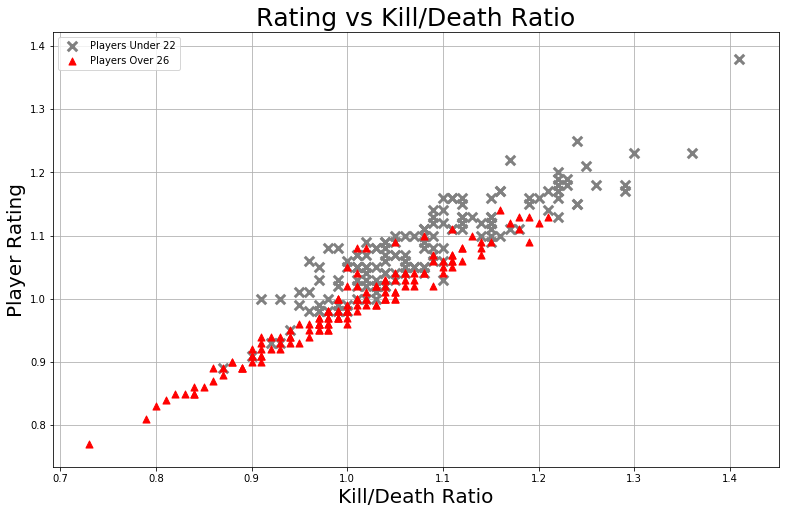

In [5]:
# Making two subsets of players(Old + Young)
dfu22 = dfPlayers.loc[(dfPlayers['Age'] < 22)]
dfo26 = dfPlayers.loc[(dfPlayers['Age'] > 26)]
ax = dfu22.reset_index().plot(kind='scatter',zorder=3, x='K/D Ratio', y='Rating',
                                           color='Grey', label='Players Under 22', figsize=(13,8),
                                            sharex = False,s = 90, marker='x', linewidth=3)
dfo26.reset_index().plot(kind='scatter', x='K/D Ratio', y='Rating',
                                          color='Red', zorder=3, label='Players Over 26', ax=ax, s = 50, marker='^')

plt.xlabel('Kill/Death Ratio', fontsize=20)
plt.ylabel("Player Rating", fontsize=20)
plt.grid(True)
plt.title("Rating vs Kill/Death Ratio", fontsize=25)

## Selecting the Top Young Players

In order to find the top youth talent, I made a subset of the orginal dataframe with a number of conditions.
In the subset, I only included players who were under the age of 20, had played less than 500 maps, and played in one of the top 20 teams. From this group of players, I selected the top 5 for my analysis.

In [6]:
dfu20 = dfPlayers[(dfPlayers['Age'] < 20) & (dfPlayers['Maps played'] < 500) & (dfPlayers['Rating'] > 1.1) &
                      ((dfPlayers['Team'] == 'Astralis') | (dfPlayers['Team'] == 'Liquid') |
                      (dfPlayers['Team'] == 'Liquid') | (dfPlayers['Team'] == 'Natus Vincere') | (dfPlayers['Team'] == 'FaZe') | 
                      (dfPlayers['Team'] == 'ENCE') | (dfPlayers['Team'] == 'fnatic') | (dfPlayers['Team'] == 'MIBR') | 
                      (dfPlayers['Team'] == 'NRG') | (dfPlayers['Team'] == 'NiP') | (dfPlayers['Team'] == 'Renegades') | 
                      (dfPlayers['Team'] == 'Vitality') | (dfPlayers['Team'] == 'mousesports') | (dfPlayers['Team'] == 'G2') | 
                      (dfPlayers['Team'] == 'AVANGAR') | (dfPlayers['Team'] == 'North') | (dfPlayers['Team'] == 'Windigo')| 
                      (dfPlayers['Team'] == 'FURIA') | (dfPlayers['Team'] == 'BIG') | (dfPlayers['Team'] == 'Grayhound') | (dfPlayers['Team'] == 'Valiance'))]
dfu20  = dfu20.groupby(['Name', 'Age'])[['Rating', 'K/D Ratio', 'Kills / Round']].mean().sort_values(by = 'Rating', ascending=False).head(10)
dfu20

,,Rating,K/D Ratio,Kills / Round
Name,Age,,,
Mathieu 'ZywOo' Herbaut,18,1.38,1.41,0.89
Yuri 'yuurih' Santos,19,1.25,1.24,0.80
Kaike 'KSCERATO' Cerato,19,1.23,1.36,0.76
Jere 'sergej' Salo,17,1.19,1.22,0.77
Ludvig 'Brollan' Brolin,16,1.11,1.08,0.73


Having the 5 players, I grouped them by some of there statistics and plotted them on a bar chart.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

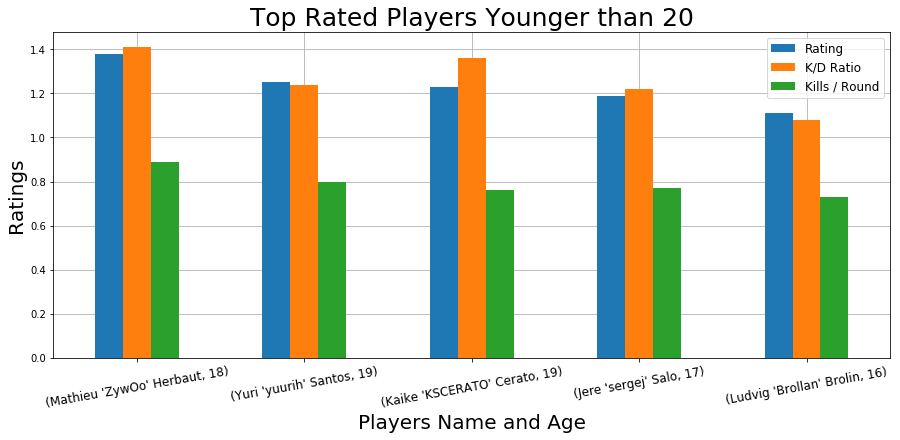

In [7]:
dfu20.plot.bar(zorder=3, figsize=(15,6))
plt.xlabel('Players Name and Age', fontsize=20)
plt.ylabel("Ratings", fontsize=20)
plt.grid(True)
plt.title("Top Rated Players Younger than 20", fontsize=25)
plt.legend(fontsize=12, bbox_to_anchor=(1, 1))
plt.xticks(fontsize=12, rotation=10)

## Choosing the Players to Predict each Youth Players future Event Ratings

I choose players who had over 750 maps played to help predict future ratings, I choose each group of players, by taking 0.1 from the rating of each youth player being predicted, my reasoning will be explained in the report. I repeated the process for all 5 players. I usually limited the prediction players to the 5 closest in desired rating, but sometimes a 6th was added if it was needed to make over 100 events predicted for that player. 

In [8]:
dfZywOo = dfPlayers[(dfPlayers['Maps played'] > 750) & (dfPlayers['Rating'] > 1.15)]
dfZywOo 

,Name,Age,Nationality,Team,Rating,Total Kills,Headshot %,Total deaths,K/D Ratio,Damage / Round,Kills / Round,Maps played
1,Aleksandr 's1mple' Kostyliev,21,Ukraine,Natus Vincere,1.23,22271,42.2,17179,1.30,87.0,0.85,992
2,Ismailcan 'XANTARES' Dörtkardeş,23,Turkey,BIG,1.22,20805,53.8,16881,1.23,95.4,0.86,930
4,Marcelo 'coldzera' David,24,Brazil,MIBR,1.20,20768,47.8,15675,1.32,82.5,0.80,1000
9,Nikola 'NiKo' Kovač,22,Bosnia and Herzegovina,FaZe,1.18,22424,50.5,18480,1.21,86.3,0.81,1048
15,Nicolai 'device' Reedtz,23,Denmark,Astralis,1.17,26620,35.3,21193,1.26,80.8,0.78,1313


In [9]:
dfyuurih = dfPlayers[(dfPlayers['Maps played'] > 750) & (dfPlayers['Rating'] > 1.12) & (dfPlayers['Rating'] < 1.16)]
dfyuurih 

,Name,Age,Nationality,Team,Rating,Total Kills,Headshot %,Total deaths,K/D Ratio,Damage / Round,Kills / Round,Maps played
23,Kenny 'kennyS' Schrub,23,France,G2,1.15,29460,31.1,23809,1.24,76.1,0.78,1445
25,Nemanja 'huNter' Kovač,23,Serbia,Valiance,1.15,17425,48.2,14570,1.20,87.3,0.80,844
30,Russel 'Twistzz' Van Dulken,19,Canada,Liquid,1.14,15370,60.2,12696,1.21,79.1,0.76,784
38,Ladislav 'GuardiaN' Kovács,27,Slovakia,FaZe,1.13,27217,29.2,22481,1.21,73.0,0.75,1380
41,Tomáš 'oskar' Šťastný,27,Czech Republic,HellRaisers,1.13,18933,31.7,16034,1.18,79.6,0.77,936
43,Patrik 'f0rest' Lindberg,30,Sweden,NiP,1.13,29898,51.0,25063,1.19,76.5,0.77,1518


In [10]:
dfKSCERATO = dfPlayers[(dfPlayers['Maps played'] > 750) & (dfPlayers['Rating'] > 1.10) & (dfPlayers['Rating'] < 1.14)]
dfKSCERATO.tail(6)

,Name,Age,Nationality,Team,Rating,Total Kills,Headshot %,Total deaths,K/D Ratio,Damage / Round,Kills / Round,Maps played
57,Emil 'Magisk' Reif,21,Denmark,Astralis,1.11,17271,48.1,14592,1.18,81.4,0.74,891
58,Christopher 'GeT_RiGhT' Alesund,28,Sweden,NiP,1.11,29886,49.1,25277,1.18,78.0,0.75,1548
59,YuanZhang 'AttackeR' Sheng,22,China,TYLOO,1.11,14941,46.0,12868,1.16,81.8,0.78,756
61,YuLun 'Summer' Cai,21,China,TYLOO,1.11,14715,48.2,12556,1.17,82.3,0.76,763
68,Valdemar 'valde' Bjørn Vangså,23,Denmark,North,1.11,15407,45.4,13402,1.15,82.4,0.76,771
150,Georgi 'SHiPZ' Grigorov,18,Bulgaria,Windigo,1.11,15948,51.2,14770,1.08,78.9,0.75,811


In [11]:
dfsergej = dfPlayers[(dfPlayers['Maps played'] > 750) & (dfPlayers['Rating'] > 1.08) & (dfPlayers['Rating'] < 1.11)]
dfsergej.head(5)

,Name,Age,Nationality,Team,Rating,Total Kills,Headshot %,Total deaths,K/D Ratio,Damage / Round,Kills / Round,Maps played
70,Oscar 'mixwell' Cañellas,23,Spain,Movistar Riders,1.1,14595,39.0,12753,1.14,80.1,0.75,751
72,Aleksi 'allu' Jalli,26,Finland,ENCE,1.1,25598,28.9,21873,1.17,75.6,0.75,1310
73,Richard 'shox' Papillon,26,France,G2,1.1,28574,49.4,24996,1.14,79.4,0.76,1441
81,Fernando 'fer' Alvarenga,27,Brazil,MIBR,1.1,20401,44.6,18075,1.13,84.5,0.76,1036
88,Peter 'dupreeh' Rasmussen,26,Denmark,Astralis,1.1,27625,50.6,24032,1.15,79.5,0.75,1433


In [12]:
dfBrollan = dfPlayers[(dfPlayers['Maps played'] > 750) & (dfPlayers['Rating'] > 1) & (dfPlayers['Rating'] < 1.09) & (dfPlayers['Nationality'] == 'Sweden')]
dfBrollan.head(5)

,Name,Age,Nationality,Team,Rating,Total Kills,Headshot %,Total deaths,K/D Ratio,Damage / Round,Kills / Round,Maps played
120,William 'draken' Sundin,23,Sweden,Ancient,1.08,16210,30.9,14218,1.14,74.7,0.73,853
121,Simon 'twist' Eliasson,24,Sweden,fnatic,1.08,22548,41.1,20413,1.10,79.9,0.75,1145
139,Robin 'flusha' Rönnquist,25,Sweden,No team,1.07,27411,41.9,24464,1.12,83.9,0.73,1447
155,Jesper 'JW' Wecksell,24,Sweden,fnatic,1.07,29125,36.8,26714,1.09,77.8,0.74,1497
172,Freddy 'KRIMZ' Johansson,25,Sweden,fnatic,1.06,23715,40.0,21144,1.12,76.9,0.71,1277


The results from these datasets where then used in my 'Analysis-Q3-PredictingFutureRatings' notebook. 